<a href="https://colab.research.google.com/github/STRMNGnwo/CT5133-DeepLearning/blob/main/DeepLearningAssignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CT5133 - Assignment 1

  -Submitted by Srinivas Ilancheran (19280039) and Lukasz Szemet (19502109) of the MSc Artificial Intelligence programme



# Assignment Sections:

### Section 1

**Instructions:**

Implement Logistic Regression (Topic 2):
  1. Use Jupyter Notebook (Python or R) to implement a neural network approach to logistic regression (no hidden layers, one output node)
  2. Your code should follow my notes to implement the algorithm from scratch.
  3. Your notebook should include a brief description of the algorithm, with all references.
  4. Your code must handle different numbers of inputs and different numbers of training cases, but you don't have to support more than one binary output node

Part 1 notes

Class node
4 functions
contructor(input then init weights), activation(sigmoid function), weighted sum(w .  x + b), forward


In [ ]:
import numpy as np
import sys
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
np.random.seed = 69

In [ ]:
class LogisticRegressionNeuron:

  def __init__(self,data_shape):

    #weights matrix shape is based on the size of the input layer
    self.weights=np.random.rand(*data_shape)

    #self.weights=np.squeeze(self.weights)
    '''the squeeze is done to change the shape from 1,3 to just 3, (Which is the shape of the input)
    this is necessary as in the dot product function, we're doing input * weight (input is of shape 3,0 which would make dot product with 1,3 shape impossible)

    An easier fix would simply be changing the order of dot product to be weight* input (1,3 can be multiplied with shape 3,0)

    '''
    print("Initial weights matrix:", self.weights)
    print("Shape of Initial weights matrix:", self.weights.shape)
    # initialising a bias value
    self.bias=np.random.rand(1,1)

    self.weighted_sum=0
    self.activation=0

  def weighted_sum_func(self,input):

    self.weighted_sum=np.dot(self.weights,input) + self.bias
    return self.weighted_sum


  def activation_func(self,input):

      self.activation=1/(1+np.exp(-input))
      return self.activation


  def forward(self,input):

    #defining a single pass

    #send the input into the weighted sum function, to get W . input

    weighted_sum=self.weighted_sum_func(input)

    #send the weighted_sum into the activation function (sigmoid) to get either a 0, or a 1 (based on threshold value)
    activation_output=self.activation_func(weighted_sum)

    return activation_output



### Implementing training loop with SGD

In [ ]:
def train_model(model,training_data_X,training_data_Y, training_params):

  # SGD parameters
  epochs=training_params["epochs"]
  max_iterations= len(training_data_X)*epochs

  print("Max iterations: ",max_iterations)
  learning_rate=training_params["lr"]

  #probability threshold:
  threshold=0.5

  samples=training_data_X.to_numpy()
  labels=training_data_Y.to_numpy()

  i=0
  prev_loss=0
  running_loss=0

  loss_per_epoch=[]
  #Training loop to perform SGD:
  while i<max_iterations:
    #randomly choose a training sample from samples
    rand_sample_index=np.random.randint(len(samples))

    input_sample=np.array(samples[rand_sample_index])

    #print("Shape of input sample:",input_sample.shape)

    #input_sample -> for the should be of shape (1,num.attributes) as its a single row containing num.attributes columns

    #model output -> probability
    probability=model.forward(input_sample)

    #convert probability into label
    predicted_label=1 if probability>0.5 else 0

    #calculate loss using Stochastic Gradient Descent
    # input_sample[1] is true class value (Actually, a sample's attributes-> samples[rand_sample], true class value-> labels[rand_sample])
    curr_loss = -((labels[rand_sample_index]*np.log(probability)) + (1-labels[rand_sample_index]) * np.log(1-probability))

    #print("Curr loss: ", curr_loss)

    delta_w = np.zeros(model.weights.shape)

    for idx, weight in enumerate(model.weights):
      delta_w[idx] = (probability - labels[rand_sample_index])*input_sample[idx]

    delta_b = (probability - labels[rand_sample_index])

    for idx, weight in enumerate(model.weights):
      model.weights[idx] -= learning_rate * delta_w[idx]

    model.bias -= learning_rate * delta_b

    i += 1
    running_loss += curr_loss

    #running_loss is loss per epoch
    if i%len(samples)==0:
      #print(f"{i/len(samples)} Epochs finished")
      loss_per_epoch.append(running_loss)
      #print(f"running_loss: {running_loss}, prev_loss: {prev_loss}, running-prev: {running_loss-prev_loss}")
      if (abs(running_loss-prev_loss)) < 10**-2: #latter condition is to check for convergence (change in weights is minimal)
        print(f"Converged! after {i} iterations ")
        i = max_iterations
      prev_loss = running_loss
      running_loss = 0

  #plotting training loss curve:

  print("Loss Per Epoch: ",loss_per_epoch)
  plt.plot([j for j in range(len(loss_per_epoch))], np.squeeze(loss_per_epoch))
  plt.show()



### Section 2

**Instructions:**

• I will supply two fairly small datasets:
  – One will be linearly separable (almost or fully), the other will not
  – I will provide sample Python code to load and plot the datasets; you are
allowed to use this code in your own assignment

• Divide each dataset randomly into:
  – Training set (70%):use for main training
  – Validation set (15%): use for tuning, e.g. selecting learning rates
  – Test set (15%): held out set for final performance evaluation

• Train a logistic regressor using your code from
Part 1, and see how it performs on both datasets

• In your notebook, summarise results and
provide observations and conclusions


In [ ]:
#Using pandas to read in the csv
blobs_dataset=pd.read_csv("/content/blobs400.csv")
circles_dataset=pd.read_csv("/content/circles500.csv")

print("Blobs dataset:")
print(blobs_dataset.head())
print("\n\nCircles dataset:")
print(circles_dataset.head())

Blobs dataset:
         X1        X2        X3  Class
0  1.418221  2.124375 -0.433905      1
1  1.590404  0.935434  1.510369      1
2  2.311458 -1.026668  1.031930      1
3  1.186782  0.591894  0.563649      1
4  1.661888  4.047231  0.987049      0


Circles dataset:
         X0        X1  Class
0  0.180647  0.552945      1
1 -0.188674  0.325629      1
2  0.413742  0.931251      0
3 -0.199223  0.902665      0
4  0.488279 -0.341202      1


In [ ]:
training_blobs = blobs_dataset.sample(frac=0.7, random_state=69)
training_circles = circles_dataset.sample(frac=0.7, random_state=69)

training_blobs = blobs_dataset.sample(frac=0.7, random_state=69)
training_circles = circles_dataset.sample(frac=0.7, random_state=69)

rest_blobs = blobs_dataset.drop(training_blobs.index)
rest_circles = circles_dataset.drop(training_circles.index)

val_blobs = rest_blobs.sample(frac=0.5, random_state=69)
val_circles = rest_circles.sample(frac=0.5, random_state=69)

test_blobs = rest_blobs.drop(val_blobs.index)
test_circles = rest_circles.drop(val_circles.index)

#dividing the attributes and the label in the training blobs training dataset
training_blobs_X=training_blobs.loc[:, ["X1","X2","X3"]]
training_blobs_Y= training_blobs.loc[:, ["Class"]]

val_blobs_X = val_blobs.loc[:, ["X1","X2","X3"]]
val_blobs_Y = val_blobs.loc[:, ["Class"]]

test_blobs_X = test_blobs.loc[:, ["X1","X2","X3"]]
test_blobs_Y = test_blobs.loc[:, ["Class"]]

training_circles_X= training_circles.loc[:, ["X0","X1"]]
training_circles_Y= training_circles.loc[:, ["Class"]]

val_circles_X = val_circles.loc[:, ["X0","X1"]]
val_circles_Y = val_circles.loc[:, ["Class"]]

test_circles_X = test_circles.loc[:, ["X0","X1"]]
test_circles_Y = test_circles.loc[:,["Class"]]

print(training_blobs.iloc[[0]].shape)

print(training_blobs_X.shape)

print(training_blobs_Y.shape)

print(test_blobs.shape)

(1, 4)
(280, 3)
(280, 1)
(60, 4)


Initial weights matrix: [[0.94662438 0.6703989 ]]
Shape of Initial weights matrix: (1, 2)
Max iterations:  350000
Converged! after 19250 iterations 
Loss Per Epoch:  [array([[257.52715088]]), array([[253.83861341]]), array([[254.4033724]]), array([[256.54298223]]), array([[255.60709581]]), array([[251.27965198]]), array([[257.97509227]]), array([[241.24764153]]), array([[261.03740745]]), array([[258.40179552]]), array([[255.0729682]]), array([[259.68796983]]), array([[249.11683563]]), array([[252.88090959]]), array([[244.5802464]]), array([[246.90506177]]), array([[247.80003557]]), array([[248.75123601]]), array([[250.44747668]]), array([[242.90313394]]), array([[248.34806288]]), array([[245.19633074]]), array([[250.27702221]]), array([[248.01541664]]), array([[244.58654169]]), array([[255.08774307]]), array([[242.59921367]]), array([[245.3288925]]), array([[247.91305911]]), array([[240.73034892]]), array([[244.03468784]]), array([[244.25754113]]), array([[245.68083679]]), array([[245.

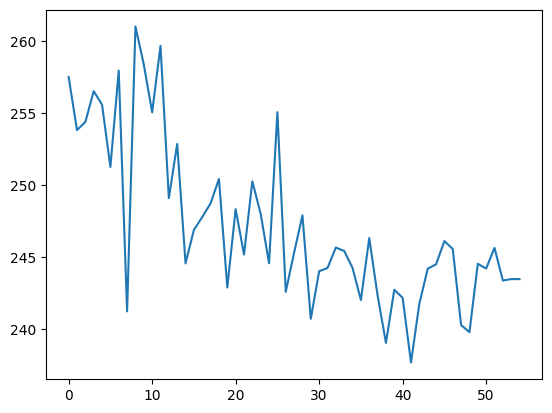

In [ ]:
#initialising the LogisiticRegression Neuron
LR_Model_circles=LogisticRegressionNeuron(np.array(training_circles_X.iloc[[0]]).shape)

#setting training params
train_params={ "epochs":1000,"lr":0.001}

#training the model on the blobs dataset's training partition
train_model(LR_Model_circles,training_circles_X,training_circles_Y, train_params)

Initial weights matrix: [[0.12999861 0.97179148 0.20900193]]
Shape of Initial weights matrix: (1, 3)
Max iterations:  2800000
Converged! after 1555680 iterations 
Loss Per Epoch:  [array([[646.69887994]]), array([[559.66373387]]), array([[449.73544182]]), array([[366.35617904]]), array([[321.36111322]]), array([[296.28412904]]), array([[268.4265712]]), array([[271.32178524]]), array([[251.76140917]]), array([[249.0242043]]), array([[243.76545604]]), array([[237.57376097]]), array([[239.56296982]]), array([[241.36573418]]), array([[243.97963016]]), array([[238.33174024]]), array([[223.9692054]]), array([[238.89595537]]), array([[231.21957913]]), array([[225.34651245]]), array([[239.57391962]]), array([[224.64622891]]), array([[243.4751839]]), array([[224.41017892]]), array([[236.08461833]]), array([[238.45462461]]), array([[234.94086767]]), array([[233.64809107]]), array([[227.76175567]]), array([[236.56673563]]), array([[227.66117843]]), array([[222.64859196]]), array([[232.1551448]]),

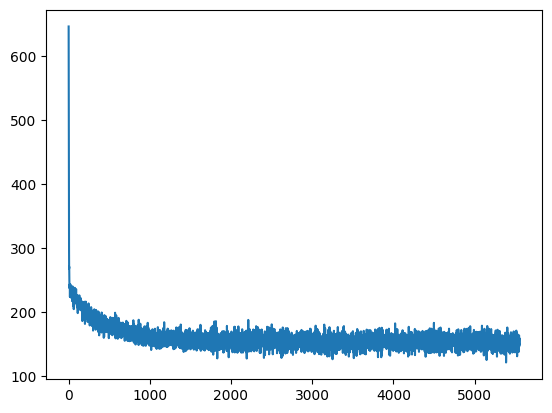

In [ ]:
#initialising the LogisiticRegression Neuron
LR_Model=LogisticRegressionNeuron(np.array(training_blobs_X.iloc[[0]]).shape)

#setting training params
train_params={ "epochs":10000,"lr":0.0005}

#training the model on the blobs dataset's training partition
train_model(LR_Model,training_blobs_X,training_blobs_Y, train_params)

In [ ]:
print("New weights matrix value:", LR_Model.weights)

New weights matrix value: [[-1.2897429  -0.44795003 -1.21073958]]


### Evaluating the model's accuracy on the datasets

In [ ]:
def evaluate_model(model, data,labels):
  predictions = []
  threshold = 0.5
  for i in range(data.shape[0]):
    predictions.append((model.forward(np.squeeze(np.array(data.iloc[[i]])))).item())

  predicted_classes = [1 if probability >= threshold else 0 for probability in predictions]

  actual_classes = list(labels.values.ravel())
  print(predicted_classes)

  matching_elements = sum(actual == pred for actual, pred in zip(actual_classes, predicted_classes))

  accuracy = matching_elements / len(predicted_classes) * 100

  print(f"Accuracy: {accuracy}")

In [ ]:
# Evaluating blobs model
evaluate_model(LR_Model,val_blobs_X,val_blobs_Y)

[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1]
Accuracy: 80.0


In [ ]:
# Evaluating circles model
evaluate_model(LR_Model_circles, val_circles_X, val_circles_Y)

[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]
Accuracy: 54.666666666666664


### Section 3

In [ ]:
#input -> insert(couple nodes in the hidden layer) -> output :)
class Section3NeuralNet:
  def __init__(self, data_shape,hidden_layer_size):

    #self.input_size= data.size

    #the hidden_layer_size defines the number of nodes that must be present in the hidden layer.
    self.hidden_layer_size=hidden_layer_size

    #obtaining the shape of the data to create a weights matrix of the same shape in each node of the hidden layer.
    self.data_shape=data_shape
    #making the hidden layer
    self.hidden_nodes=[]


    #list to store outputs from each layer (Excluding the output layer's outputs) (stored activation outputs (a^i))
    self.layer_outputs=[]

    #making the variable number of nodes in the single hidden layer
    for i in range(self.hidden_layer_size):
      self.hidden_nodes.append(LogisticRegressionNeuron(self.data_shape))

    #defining the output layer (which is also a logistic regression layer)
    print("Output layer details: ")
    self.output_layer=LogisticRegressionNeuron((1,len(self.hidden_nodes)))


  def forward(self,data):

    hidden_layer_output=[]
    #send data through each of the nodes in the hidden layer and store their output
    for hidden_node in self.hidden_nodes:
      hidden_layer_output.append(hidden_node.forward(data))

    self.layer_outputs.append(np.concatenate(hidden_layer_output))
    #print(f"outputs: {self.layer_outputs[-1]} ")

    #shape of hidden layer activation output-> (num. of nodes in hidden layer, 1)
    #print("Shape of hidden layer activation output:", np.concatenate(hidden_layer_output).shape)

    #combine all the outputs from the hidden layer into a single matrix.
    output_layer_input = self.layer_outputs[-1]

    #sending the data into the output layer
    return self.output_layer.forward(output_layer_input) # this would need to be thresholded to obtain a class value of either 0 or 1







### Implementing a training algorithm that uses SGD + Back-prop

In [ ]:
def train_SGD_backprop(model,training_data_X,training_data_Y, training_params): #takes in model, all the training data and a dictionary of learning params.

  # SGD parameters
  epochs=training_params["epochs"]
  learning_rate=training_params["lr"]

  max_iterations= len(training_data_X)*epochs

  print("Max iterations: ",max_iterations)

  #probability threshold:
  threshold=0.5

  samples=training_data_X.to_numpy()
  labels=training_data_Y.to_numpy()

  iterations=0

  while iterations<max_iterations:

    #randomly choose a training sample from samples
    rand_sample_index=np.random.randint(len(samples))

    input_sample=np.array(samples[rand_sample_index])

    #print("Shape of input sample:",input_sample.shape)

    #input_sample -> for the should be of shape (1,num.attributes) as its a single row containing num.attributes columns

    #model output -> probability
    probability=model.forward(input_sample)

    #convert probability into label
    predicted_label=1 if probability>0.5 else 0

    #----------------------------------------------------------------------------------------------------------------------------------------------------
    #PERFORMING BACK-PROP:

    #obtaining a list of each layer's outputs

    #partial derivative of Output layer's weighted sum (delta Z) -> activation output of the output layer - ground truth
    output_delta_z= probability-labels[rand_sample_index]

    #partial derivative of Output layer's Weights matrix (delta W) -> pd of output layer's weighted sum (z) * hidden layer's activation value

    # 0th layer-> hidden layer and 1st layer is output layer
    output_delta_w= output_delta_z * model.output_layer.activation

    #partial derivative of Output layer's bias
    delta_b_output= output_delta_z

    #for idx, weight in enumerate(model.output_layer.weights):
    #  model.output_layer.weights[idx] -= learning_rate * output_delta_w[idx]

    #model.output_layer.bias -= learning_rate * delta_b_output

    # looping through the hidden layers (in this case we just have the 1 hidden layer)
    pd_cost=[]
    pd_weights=[]
    pd_biases=[]

    #theres only 1 hidden layer so all the nodes belong to the same layer and layer +1 refers to the output layer
    for idx,hidden_node in enumerate(model.hidden_nodes): #all these nodes belong to the hidden layer

      #delta z for this node = activation value of this node
      #idx-> which node in current hidden layer
      delta_z_hidden= hidden_node.weighted_sum* np.sum(output_delta_z*model.output_layer.weights)
      #print(f"delta_z_hidden = {delta_z_hidden}")
      #
      delta_w_hidden=output_delta_z * input_sample
      #print(f"delta_w_hidden = {delta_w_hidden}")
      #
      delta_b_hidden=output_delta_z
      #print(f"delta_b_hidden = {delta_b_hidden}")

      pd_cost.append(delta_z_hidden)
      pd_weights.append(delta_w_hidden)
      pd_biases.append(delta_b_hidden)

      #for index, weight in enumerate(hidden_node.weights):
      #  print(f"weight = {hidden_node.weights[index]}")
       # hidden_node.weights[index] -= learning_rate * delta_w_hidden[index]
       # print(f"new weight = {hidden_node.weights[index]}")

     # hidden_node.bias -= learning_rate * delta_b_hidden

    iterations+=1



In [ ]:
model=Section3NeuralNet(training_circles_X.iloc[[0]].shape,5)

#setting training params
train_params={ "epochs":100,"lr":0.001}

train_SGD_backprop(model,training_circles_X,training_circles_Y,train_params)

Initial weights matrix: [[0.97688936 0.41909304]]
Shape of Initial weights matrix: (1, 2)
Initial weights matrix: [[0.52360598 0.18020752]]
Shape of Initial weights matrix: (1, 2)
Initial weights matrix: [[0.40590748 0.74522583]]
Shape of Initial weights matrix: (1, 2)
Initial weights matrix: [[0.74157962 0.29476645]]
Shape of Initial weights matrix: (1, 2)
Initial weights matrix: [[0.58254463 0.94664422]]
Shape of Initial weights matrix: (1, 2)
Output layer details: 
Initial weights matrix: [[0.88346463 0.18128898 0.05657464 0.19198889 0.79381378]]
Shape of Initial weights matrix: (1, 5)
Max iterations:  35000


In [ ]:
# Evaluating circles neural net
evaluate_model(model,val_circles_X.iloc[[0]],val_circles_Y.iloc[[0]])

[1]
Accuracy: 0.0


### Section 4

### Section 5